<h1 align=center>Aprendizado por Reforço para Tomada de Decisão em Ambientes Complexos</h1>

<p align=center><img src=https://i0.wp.com/www.datageeks.com.br/wp-content/uploads/2019/06/Aprendizagem-por-Refor%C3%A7o.jpg?resize=350%2C350&ssl=1></p>

Anteriomente, focamos no aprendizado de máquina supervisionado e não supervisionado. Também aprendemos como aproveitar as redes neurais artificiais e o aprendizado profundo para lidar com os problemas encontrados com esses tipos de aprendizado de máquina. Como você deve se lembrar, o aprendizado supervisionado se concentra em prever um rótulo de categoria ou valor contínuo de um determinado vetor de recursos de entrada. O aprendizado não supervisionado se concentra na extração de padrões de dados, tornando-o útil para compactação de dados, clustering ou aproximando a distribuição do conjunto de treinamento para gerar novos dados.

Agora, voltamos nossa atenção para uma categoria separada de aprendizado de máquina, aprendizado por reforço (RL), que é diferente das categorias anteriores, pois se concentra em aprender uma série de ações para otimizar uma recompensa geral - por exemplo, vencer em um jogo de xadrez. Em resumo, abordaremos os seguintes tópicos:
* Aprender os conceitos básicos de RL, familiarizar-se com as interações agente/ambiente e entender como funciona o processo de recompensa, a fim de ajudar a tomar decisões em ambientes complexos
* Apresentando diferentes categorias de problemas de RL, tarefas de aprendizado baseadas em modelo e sem modelo, Monte Carlo e algoritmos de aprendizado de diferença temporal
* Implementação de um algoritmo de Q-learning em formato tabular
* Compreender a aproximação de função para resolver problemas de RL e combinar RL com aprendizado profundo através da implementação de um algoritmo Q-learning profundo

RL é uma área de pesquisa complexa e vasta, e este módulo se concentrará nos fundamentos. Como este módulo serve como uma introdução, e para manter nossa atenção nos métodos e algoritmos importantes, trabalharemos principalmente com exemplos básicos que ilustram os principais conceitos. No entanto, no final deste módulo, examinaremos um exemplo mais desafiador e utilizaremos arquiteturas de aprendizado profundo para uma abordagem de RL específica, conhecida como Q-learning profundo.

### Introdução – aprendendo com a experiência
Nesta seção, apresentaremos primeiro o conceito de RL como um ramo do aprendizado de máquina e veremos suas principais diferenças em comparação com outras tarefas de aprendizado de máquina. Depois disso, abordaremos os componentes fundamentais de um sistema RL. Em seguida, veremos a formulação matemática RL baseada no processo de decisão de Markov.

### Entendendo o aprendizado por reforço
Até este ponto, este material se concentrou principalmente no aprendizado *supervisionado* e *não supervisionado*. Lembre-se de que no aprendizado *supervisionado*, contamos com exemplos de treinamento rotulados, fornecidos por um supervisor ou um especialista humano, e o objetivo é treinar um modelo que possa generalizar bem para exemplos de teste não rotulados e não vistos. Isso significa que o modelo de aprendizado supervisionado deve aprender a atribuir os mesmos rótulos ou valores a um determinado exemplo de entrada que o especialista humano supervisor. Por outro lado, no aprendizado não supervisionado, o objetivo é aprender ou capturar a estrutura subjacente de um conjunto de dados, como em métodos de agrupamento e redução de dimensionalidade; ou aprender a gerar novos exemplos de treinamento sintéticos com uma distribuição subjacente semelhante. O RL é substancialmente diferente do aprendizado supervisionado e não supervisionado e, portanto, o RL é frequentemente considerado a "terceira categoria de aprendizado de máquina".

O elemento chave que distingue o RL de outras subtarefas de aprendizado de máquina, como aprendizado supervisionado e não supervisionado, é que o RL está centrado no conceito de **aprendizado por interação**. Isso significa que em RL, o modelo aprende com as interações com um ambiente para maximizar uma **função de recompensa.**

Embora a maximização de uma função de recompensa esteja relacionada ao conceito de minimizar a função de custo no aprendizado supervisionado, os rótulos *corretos* para aprender uma série de ações não são conhecidos ou definidos antecipadamente em RL - em vez disso, eles precisam ser aprendidos por meio de interações com o ambiente, a fim de alcançar um determinado resultado desejado - como vencer em um jogo. Com o RL, o modelo (também chamado de **agente**) interage com seu ambiente e, ao fazê-lo, gera uma sequência de interações que, em conjunto, são chamadas de **episódio**. Por meio dessas interações, o agente coleta uma série de recompensas determinadas pelo ambiente. Essas recompensas podem ser positivas ou negativas e, às vezes, não são divulgadas ao agente até o final de um episódio.

Por exemplo, imagine que queremos ensinar um computador a jogar xadrez e vencer jogadores humanos. Os rótulos (recompensas) para cada movimento individual de xadrez feito pelo computador não são conhecidos até o final do jogo, porque durante o jogo em si, não sabemos se um movimento específico resultará em ganhar ou perder esse jogo. Apenas no final do jogo o feedback é determinado. Esse feedback provavelmente seria uma recompensa positiva dada se o computador ganhasse o jogo, porque o agente havia alcançado o resultado geral desejado; e vice-versa, uma recompensa negativa provavelmente seria dada se o computador tivesse perdido o jogo. 

Além disso, considerando o exemplo de jogar xadrez, a entrada é a configuração atual, por exemplo, a disposição das peças individuais de xadrez no tabuleiro. Dado o grande número de entradas possíveis (os estados do sistema), é impossível rotular cada configuração ou estado como positivo ou negativo. Portanto, para definir um processo de aprendizado, fornecemos recompensas (ou penalidades) ao final de cada jogo, quando sabemos se atingimos o resultado desejado – se vencemos ou não o jogo.

Esta é a essência do RL. Em RL, não podemos ou não ensinamos a um agente, computador ou robô, como fazer as coisas; podemos apenas especificar o que queremos que o agente alcance. Então, com base no resultado de um teste específico, podemos determinar recompensas dependendo do sucesso ou fracasso do agente. Isso torna a RL muito atraente para a tomada de decisões em ambientes complexos – especialmente quando a tarefa de resolução de problemas requer uma série de etapas, que são desconhecidas, difíceis de explicar ou definir. Além de aplicações em jogos e robótica, exemplos de RL também podem ser encontrados na natureza. Por exemplo, treinar um cão envolve RL – nós entregamos recompensas (guloseimas) ao cão quando ele realiza certas ações desejáveis. Ou considere um cão médico treinado para avisar seu parceiro de uma convulsão que se aproxima. Neste caso, não sabemos o mecanismo exato pelo qual o cão é capaz de detectar uma convulsão que se aproxima, e certamente não poderíamos definir uma série de etapas para aprender a detecção de convulsões, mesmo que tivéssemos conhecimento preciso disso. mecanismo. No entanto, podemos recompensar o cão com um petisco se ele detectar com sucesso uma convulsão para reforçar esse comportamento!

Embora a RL forneça uma estrutura poderosa para aprender uma série arbitrária de ações, para atingir um determinado objetivo, lembre-se de que a RL ainda é uma área de pesquisa relativamente jovem e ativa com muitos desafios não resolvidos. Um aspecto que torna o treinamento de modelos de RL particularmente desafiador é que as entradas do modelo consequentes dependem de ações realizadas anteriormente. Isso pode levar a todos os tipos de problemas e geralmente resulta em comportamento de aprendizagem instável. Além disso, essa dependência de sequência em RL cria o chamado **efeito retardado**, o que significa que a ação realizada em um passo de tempo `t` pode resultar em uma recompensa futura aparecendo em um número arbitrário de passos depois.

### Definindo a interface agente-ambiente de um sistema de aprendizado por reforço
Em todos os exemplos de RL, podemos encontrar duas entidades distintas: um agente e um ambiente. Formalmente, um **agente** é definido como uma entidade que aprende a tomar decisões e interage com o ambiente ao seu redor por meio de uma ação. Em troca, como consequência de uma ação, o agente recebe observações e um sinal de recompensa conforme governado pelo ambiente. O **ambiente** é qualquer coisa que esteja fora do agente. O ambiente se comunica com o agente e determina o sinal de recompensa para a ação do agente, bem como suas observações.

O **sinal de recompensa** é o feedback que o agente recebe da interação com o ambiente, que geralmente é fornecido na forma de um valor escalar e pode ser positivo ou negativo. O objetivo da recompensa é dizer ao agente o quão bem ele se saiu. A frequência com que o agente recebe a recompensa depende da tarefa ou problema em questão. Por exemplo, no jogo de xadrez, a recompensa seria determinada após uma partida completa com base no resultado de todas as jogadas: uma vitória ou uma derrota. Por outro lado, poderíamos definir um labirinto tal que a recompensa seja determinada após cada passo de tempo. Nesse labirinto, o agente tenta maximizar suas recompensas acumuladas ao longo de sua vida – onde a vida descreve a duração de um episódio.

O diagrama a seguir ilustra as interações e a comunicação entre o agente e o ambiente:

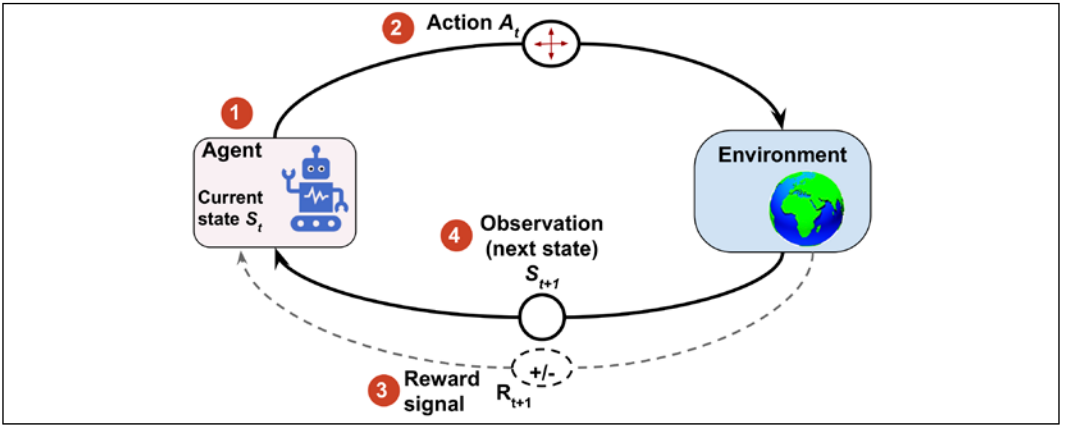

In [2]:
from IPython.display import Image
Image('imagens\RL_Diagrama.PNG')
